# Importing the libraries 

<h2 style="color: teal; font-family: 'Arial', sans-serif; text-align: center; border-bottom: 2px solid red; padding-bottom: 5px; background-color: #f8f8f8; margin: 10px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);">import the libraries that we will use in our project</h2><h2 


In [1]:
import numpy as np 
import openpyxl
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import  RandomForestRegressor 
from sklearn.ensemble import  GradientBoostingRegressor 
from xgboost import XGBRegressor 
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error  
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns 
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split 



<h2 style="color: teal; font-family: 'Arial', sans-serif; text-align: center; border-bottom: 2px solid red; padding-bottom: 5px; background-color: #f8f8f8; margin: 10px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);">import the car price prediction dataset using pandas</h2>


In [2]:
car_df = pd.read_csv('E:\\collage\\car_price_prediction.csv')
car_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<h2 style="color: teal; font-family: 'Arial', sans-serif; text-align: center; border-bottom: 2px solid red; padding-bottom: 5px; background-color: #f8f8f8; margin: 10px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);">Data Cleaning</h2>


<h2 style="color: teal; font-family: 'Arial', sans-serif; text-align: center; border-bottom: 2px solid red; padding-bottom: 5px; background-color: #f8f8f8; margin: 10px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);">check duplication</h2> 


***To start the clean of data you should remove the duplicated data.To see if there is duplication in the data we will use duplicated() method***

In [3]:
car_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19232    False
19233    False
19234    False
19235    False
19236    False
Length: 19237, dtype: bool

***we can't see all data and understand if there duplication or not so we can count and get the number of duplicated data***



In [4]:
car_df.duplicated().sum()

313

***we foud alot of data dduplicated so we should remove it using drop_duplicates()***

In [5]:
#inplce you found duplicata drop data
car_df.drop_duplicates(inplace=True)

In [6]:
#check after drop
car_df.duplicated().sum()

0

In [7]:
#see number of cloumn and rows after drop
car_df.shape

(18924, 18)

<h2 style="color: teal; font-family: 'Arial', sans-serif; text-align: center; border-bottom: 2px solid red; padding-bottom: 5px; background-color: #f8f8f8; margin: 10px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);">deals with Missing Values</h2> 


***How many missing data points do we have?***

In [8]:
# get the number of missing data points per column
missing_values = car_df.isnull().sum()
# look at the # of missing points
missing_values

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

***there is no missing value .to make sure we can see the what percentage of the values in our dataset were missing to giveus a better sense of the scale of this problem:***

In [9]:
total_cells = np.product(car_df.shape)
total_missing = missing_values.sum()
percent_missing = (total_missing/total_cells) * 100
print(round(percent_missing),"%")

0 %


<h2 style="color: teal; font-family: 'Arial', sans-serif; text-align: center; border-bottom: 2px solid red; padding-bottom: 5px; background-color: #f8f8f8; margin: 10px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);">If there is a missing value what should we do?
</h2> 


***1-we can remove any rows or columns that contain missing values using dropna() method 
   2-we can fill in the missing values
   a)we can specify what we want the NaN values to be replaced with. 
   we are going to replace all the NaN values with 0. fill_missing = car_df.fillna(0)
b) replace missing values with whatever value comes directly after it in the same column.
 fill_missing = car_df.fillna(method='bfill', axis=0
c)replace missing values with whatever value comes directly after it in the same column., **fill_missing = car_df.fillna(method='bfill', axis=0)***

In [10]:
car_df=car_df.drop(['ID','Doors'],axis=1)
car_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [11]:
import datetime
dtime=datetime.datetime.now()
car_df['Age']=dtime.year-car_df['Prod. year']

In [12]:
car_df["Mileage"]=car_df["Mileage"].str.replace('km','')


In [13]:
car_df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [14]:
car_df['Engine volume']=car_df['Engine volume'].str.replace('Turbo','')
car_df['Engine volume']=car_df['Engine volume'].astype(float)
car_df['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18924, dtype: float64

In [15]:
car_df_numeric=car_df.select_dtypes(exclude='object')
for col in car_df_numeric:
    q1=car_df[col].quantile(0.25)
    q3=car_df[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    outlier=((car_df_numeric[col]>high)|(car_df_numeric[col]<low)).sum()
    total=car_df_numeric[col].shape[0]
    print(f"Total Outliers in {col} are :{outlier}-{round(100*(outlier)/total,2)}%")
    if outlier >0:
        car_df=car_df.loc[(car_df[col]<=high) & (car_df[col]>=low)]

Total Outliers in Price are :1055-5.57%
Total Outliers in Prod. year are :1492-7.88%
Total Outliers in Engine volume are :1358-7.18%
Total Outliers in Cylinders are :4765-25.18%
Total Outliers in Airbags are :0-0.0%
Total Outliers in Age are :1777-9.39%


In [16]:
car_df["Levy"]=car_df["Levy"].replace('-',0)
car_df.head(10)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,Left wheel,White,4,7
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,Left wheel,White,12,13
7,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,Left wheel,Grey,12,10
8,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,Left wheel,Black,12,9
15,549,1079,TOYOTA,CHR,2018,Jeep,Yes,Petrol,2.0,74146,4.0,Automatic,Front,Left wheel,White,12,5
16,7683,810,HYUNDAI,Elantra,2016,Sedan,Yes,Petrol,1.8,121840,4.0,Automatic,Front,Left wheel,Blue,12,7
17,28382,810,HYUNDAI,Elantra,2016,Sedan,Yes,Petrol,1.8,54317,4.0,Automatic,Front,Left wheel,White,4,7


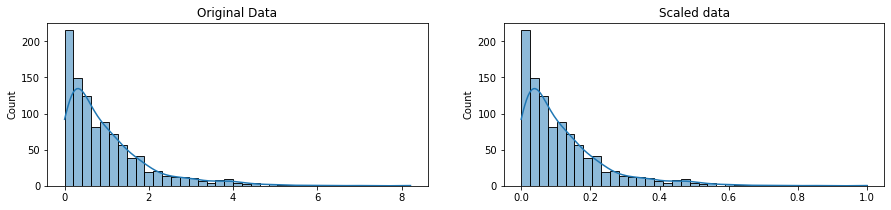

In [17]:
original_data = np.random.exponential(size=1000)
scaled_data = minmax_scaling(original_data, columns=[0])
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

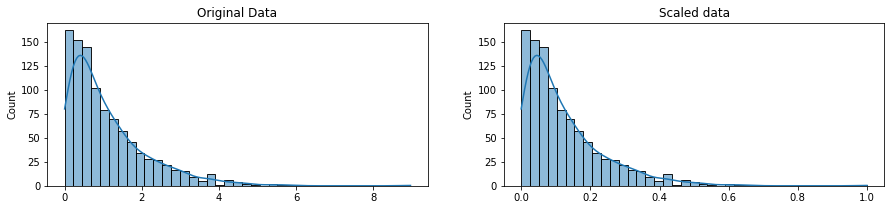

In [18]:
original_data = np.random.exponential(size=1000)
scaled_data = minmax_scaling(original_data, columns=[0])
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [19]:

# correlation_matrix = car_df.corr()                    # Creating a correlation matrix to help us understand more informations about the data 

# fig, ax = plt.subplots(figsize=(15, 10))

# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.0,ax=ax,fmt='.3f') # use Seaborn library for creating a heatmap

# # in this step i will put title and xlabel and ylabel to the heatmap
# plt.title('Cars Correlation Heatmap')
# plt.xlabel(' Columns Name ')
# plt.ylabel(' Columns Name ')

# plt.show()

In [20]:

car_df.dropna(inplace=True)  # Handling missing values if it exists

car_sorted_by_price = car_df.sort_values(by="Price", ascending=True)
car_sorted_by_price = car_sorted_by_price.set_index("Category")


car_sorted_by_price_desc = car_df.sort_values(by="Price", ascending=False)
car_sorted_by_price_desc = car_sorted_by_price_desc.set_index("Category")


car_sorted_by_age = car_df.sort_values(by="Age", ascending=True)
car_sorted_by_age = car_sorted_by_age.set_index("Manufacturer")


car_sorted_by_age_desc = car_df.sort_values(by="Age", ascending=False)
car_sorted_by_age_desc = car_sorted_by_age_desc.set_index("Manufacturer")



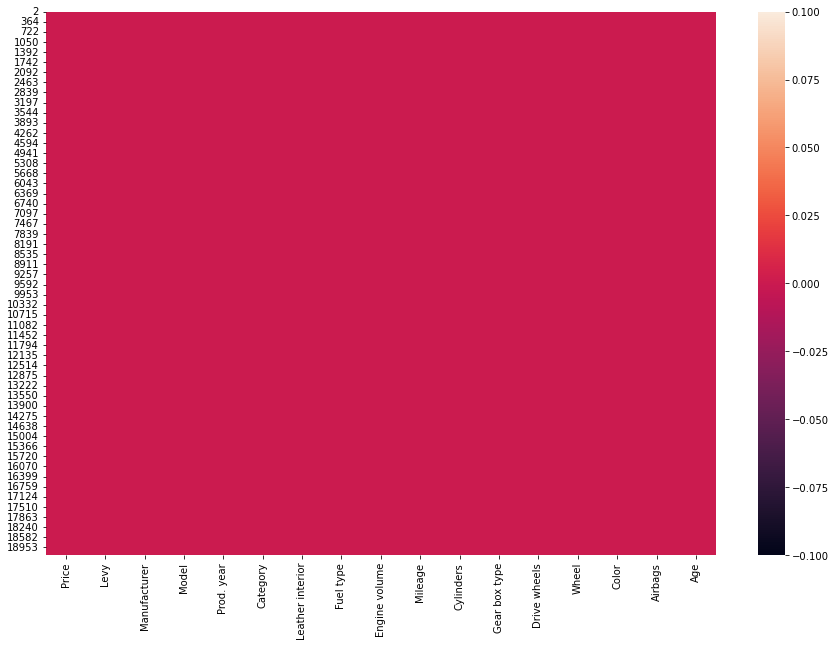

<Figure size 720x480 with 0 Axes>

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.figure(dpi=120)
sns.heatmap(car_df.isna(),ax=ax)
plt.show()
#there is no null values

In [22]:
car_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,Left wheel,White,4,7
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,Left wheel,White,12,13


<h2 style="color: teal; font-family: 'Arial', sans-serif; text-align: center; border-bottom: 2px solid red; padding-bottom: 5px; background-color: #f8f8f8; margin: 10px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);">Pie Charts</h2>





***This pie chart delineates the proportion of cars equipped with leather interiors juxtaposed against those lacking this feature. The presence of leather upholstery is often indicative of higher-end vehicles, thereby providing insights into the prevalence of luxury amenities within the automotive market. This visual representation serves to elucidate the distribution of a key quality indicator, influencing perceptions of car interior standards.***



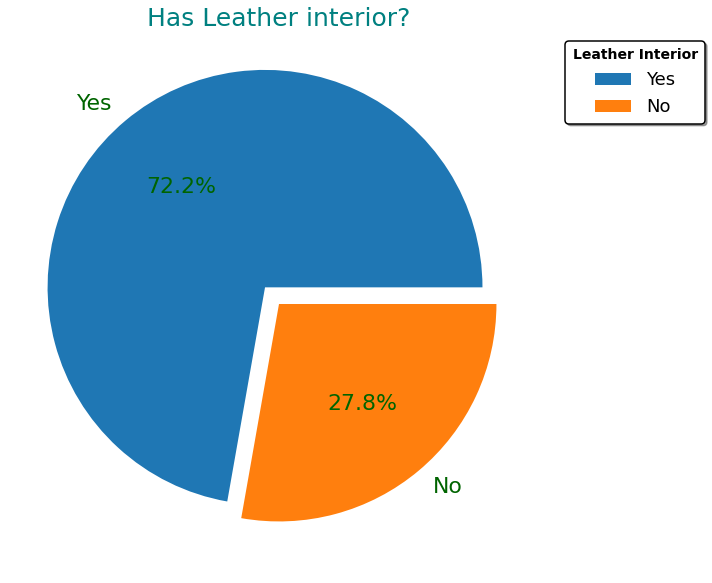

In [23]:
car_Leather = car_df['Leather interior'].value_counts()

explode = (0.1, 0)  

plt.figure(figsize=(15, 10))
plt.pie(car_Leather, explode=explode, labels=car_Leather.index,autopct='%1.1f%%',textprops={'fontsize': 22, 'color': 'darkgreen'})

plt.title("Has Leather interior?",color='teal',fontsize='25')

legend =plt.legend(car_Leather.index, title="Cars Leather Interior", loc="upper right", fontsize='18', shadow=True, bbox_to_anchor=(1.3, 1),edgecolor='black')

legend.set_title("Leather Interior", prop={'size': 14, 'weight': 'bold'})
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_edgecolor('black')

plt.show()




***This diagram illustrates the prevalence of right-hand and left-hand driving seat configurations in cars across different countries, reflecting variations in traffic regulations. For instance, countries like Egypt typically feature left-hand driving seats, while others, including some in the top portion of America, adhere to a right-hand driving configuration. The visual representation serves to underscore the diverse global standards in vehicular ergonomics and road traffic conventions.***














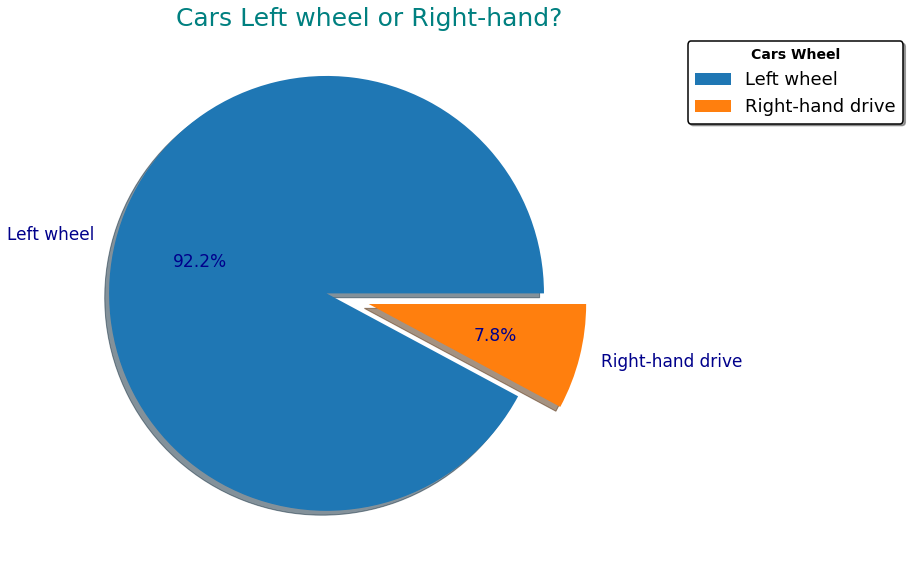

In [24]:


car_Wheel = car_df['Wheel'].value_counts()

explode = (0.2, 0)  

plt.figure(figsize=(15, 10))
plt.pie(car_Wheel, explode=explode, labels=car_Wheel.index,autopct='%1.1f%%',textprops={'fontsize': 17, 'color': 'darkblue'},shadow=True)

plt.title("Cars Left wheel or Right-hand?",color='teal',fontsize='25')
plt.yticks(fontsize='30')
legend =plt.legend(car_Wheel.index, title="Cars Wheel", loc="upper right", fontsize='18', shadow=True, bbox_to_anchor=(1.5, 1),edgecolor='black')

legend.set_title("Cars Wheel", prop={'size': 14, 'weight': 'bold'})
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_edgecolor('black')

plt.show()

***The pie plot visualizes the distribution of car types based on their 'Gear box type.' This visualization is essential as it provides a clear representation of the proportion of cars with different transmission systems (Automatic, Manual, Tiptronic, Variator ).It allows quick insights into the prevalence of each gear type, aiding in understanding market preferences and informing automotive-related decisions.***

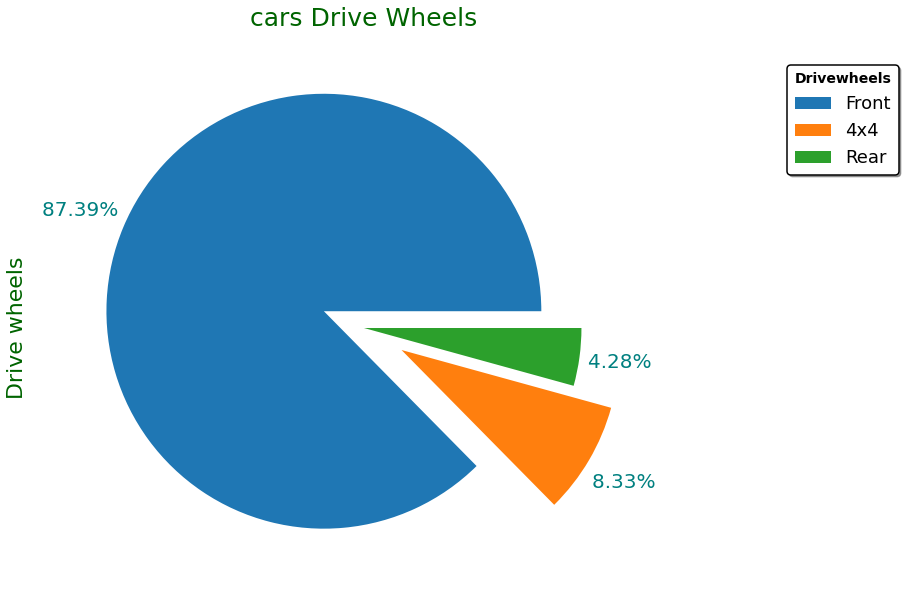

In [25]:
Drivewheels =pd.DataFrame(car_df['Drive wheels'].value_counts()) 
explode = (0.2, 0.2) + (0, ) * (len(Drivewheels) - 2)

plot =Drivewheels.plot.pie(y='Drive wheels', explode=explode,figsize=(15,10), autopct='%1.2f%% ' ,labels=None , pctdistance=1.2 ,textprops={'fontsize': 20, 'color': 'teal'})

plt.title('cars Drive Wheels', fontsize=25,color='darkgreen',pad=30)
plt.ylabel('Drive wheels', fontsize=22,color='darkgreen',labelpad=65)
legend =plt.legend(Drivewheels.index, title="Drive Wheel", loc="upper right", fontsize='18', shadow=True, bbox_to_anchor=(1.5, 1),edgecolor='black')

legend.set_title("Drivewheels", prop={'size': 14, 'weight': 'bold'})
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_edgecolor('black')


plt.show()

***In this pie chart, the distribution of cars by fuel type is depicted, illustrating the proportion of each fuel type among the dataset. This visualization is crucial for understanding the diversity of fuel options in the automotive industry, providing insights into the popularity of different fuel types and their environmental impact. By showcasing the prevalence of each fuel category, stakeholders can make informed decisions about sustainable energy solutions and regulatory initiatives.***

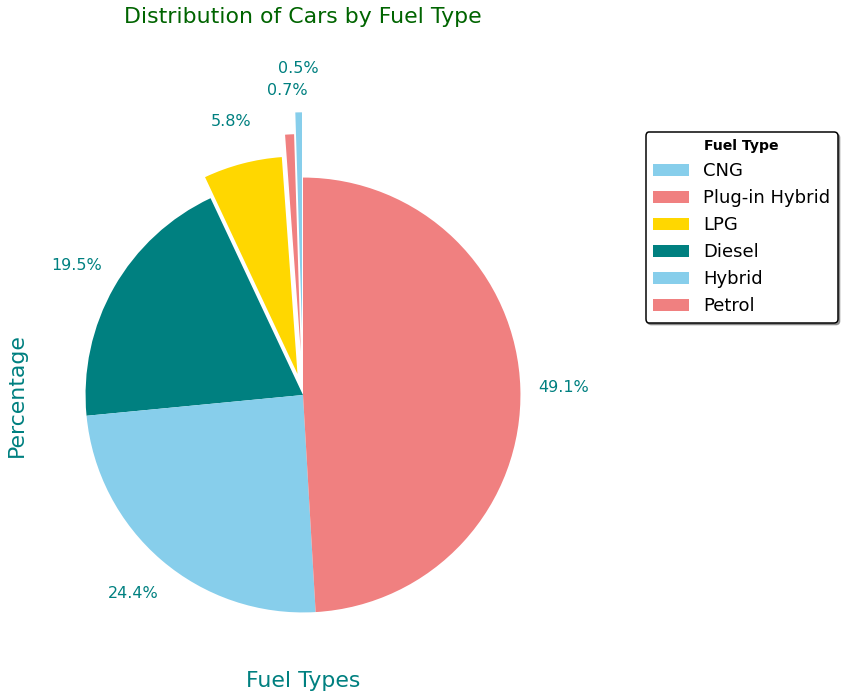

In [26]:
fuel = pd.DataFrame(car_df['Fuel type'].value_counts())

fuel = fuel.sort_values(by='Fuel type')

explode = (0.3, 0.2,0.1) + (0, ) * (len(fuel) - 3)

custom_colors = ['skyblue', 'lightcoral', 'gold', 'teal']


plot = fuel.plot.pie(y='Fuel type', figsize=(15, 10), autopct='%1.1f%%', labels=None, pctdistance=1.2, 
colors=custom_colors, explode=explode, startangle=90,textprops={'fontsize': 16, 'color': 'teal'})

plt.xlabel('Fuel Types', fontsize=22, color='teal')
plt.ylabel('Percentage', fontsize=22, color='teal')

legend = plt.legend(fuel.index, title="Fuel Type", loc="upper right", fontsize='18', 
                    shadow=True, bbox_to_anchor=(1.5, 1), edgecolor='black')

legend.set_title("Fuel Type", prop={'size': 14, 'weight': 'bold'})
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_edgecolor('black')

plt.title("Distribution of Cars by Fuel Type", fontsize=22, pad=100,color='darkgreen')

plt.show()

***In this pie chart illustrating drive wheel distribution (front, rear, 4 by 4 ), we gain insights into the diversity of car configurations. This visualization is crucial for understanding the prevalence of different drive systems in the dataset, providing valuable information for car enthusiasts, manufacturers, and analysts interested in market trends and consumer preferences. The clear representation allows for a quick and intuitive grasp of the distribution, aiding decision-making in the automotive industry.***

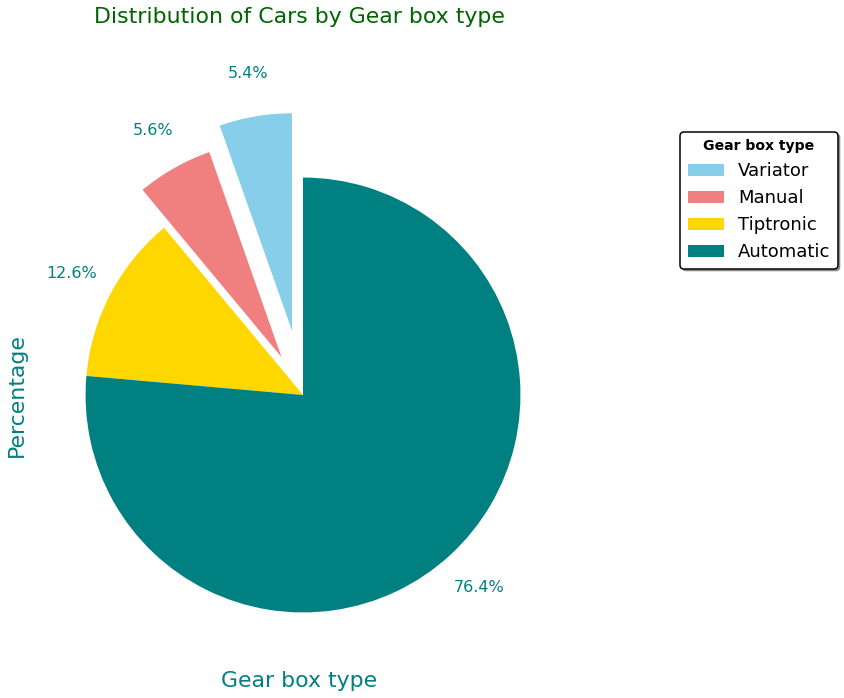

In [27]:
Gearboxtype =pd.DataFrame(car_df['Gear box type'].value_counts()) 

Gearboxtype = Gearboxtype.sort_values(by='Gear box type')

explode = (0.3,0.2) + (0, ) * (len(Gearboxtype) - 2)

custom_colors = ['skyblue', 'lightcoral', 'gold', 'teal']


plot = Gearboxtype.plot.pie(y='Gear box type', figsize=(15, 10), autopct='%1.1f%%', labels=None, pctdistance=1.2, 
colors=custom_colors, explode=explode, startangle=90,textprops={'fontsize': 16, 'color': 'teal'})

plt.xlabel('Gear box type ', fontsize=22, color='teal')
plt.ylabel('Percentage', fontsize=22, color='teal')

legend = plt.legend(Gearboxtype.index, title="Fuel Type", loc="upper right", fontsize='18', 
                    shadow=True, bbox_to_anchor=(1.5, 1), edgecolor='black')

legend.set_title("Gear box type", prop={'size': 14, 'weight': 'bold'})
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_edgecolor('black')

plt.title("Distribution of Cars by Gear box type ", fontsize=22, pad=100,color='darkgreen')

plt.show()

<h2 style="color: teal; font-family: 'Arial', sans-serif; text-align: center; border-bottom: 2px solid red; padding-bottom: 5px; background-color: #f8f8f8; margin: 10px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);">convert the dataset into numeric  </h2>

 
 
 
 ***we will excute this step after visualization*** 

In [26]:
# dobject=car_df.select_dtypes(include='object')
# dnumeric=car_df.select_dtypes(exclude='object')


# la=LabelEncoder()


# for i in range(0,dobject.shape[1]):
#      dobject.iloc[:,i]=la.fit_transform(dobject.iloc[:,i])
        
# car_df=pd.concat([dobject,dnumeric],axis=1)



# #car_df_numeric=car_df.select_dtypes(exclude='object')
# for col in car_df_numeric:
#     q1=car_df_numeric[col].quantile(0.25)
#     q3=car_df_numeric[col].quantile(0.75)
#     iqr=q3-q1
#     low=q1-1.5*iqr
#     high=q3+1.5*iqr
#     outlier=((car_df_numeric[col]>high)|(car_df_numeric[col]<low)).sum()
#     total=car_df_numeric[col].shape[0]
#     print(f"Total Outliers in {col} are :{outlier}-{round(100*(outlier)/total,2)}%")
#     if outlier >0:
#         car_df_numeric=car_df_numeric.loc[(car_df_numeric[col]<=high) & (car_df_numeric[col]>=low)]

<h2 style="color: teal; font-family: 'Arial', sans-serif; text-align: center; border-bottom: 2px solid red; padding-bottom: 5px; background-color: #f8f8f8; margin: 10px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);">Model</h2>

***after visulaization*** 

In [ ]:
x = car_df.drop('Price',axis=1)   
y = car_df['Price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.2,random_state=42)

In [ ]:
Algorithm= ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor','SVR']
R2=[]
RMSE=[]

In [ ]:
def models (model): 
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    rmse=np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score=model.score(x_test,y_test)
    print(f"The Score of Model is :{score}")
    

In [ ]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor ()
model3 = RandomForestRegressor ()
model4 = GradientBoostingRegressor ()
model5 = XGBRegressor ()
model6 = SVR ()

In [ ]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)
models(model6)

In [ ]:
df = pd.DataFrame({'Algorithm':Algorithm,'R2_Score':R2,'RMSE':RMSE})
df

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,df.R2_Score,label='R2_Score')
plt.legend()
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,df.RMSE,label='RMES',color='red',marker='o')
plt.legend()
plt.show()

<h2 style="color: teal; font-family: 'Arial', sans-serif; text-align: center; border-bottom: 2px solid red; padding-bottom: 5px; background-color: #f8f8f8; margin: 10px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);">Box plot</h2>


***will excute this code after visulization*** 

In [ ]:
# # this code after transform the dataset into numeric 
# plt.figure(figsize=(15, 10))
# plt.boxplot(car_df['Levy'], vert=True, patch_artist=True) # Age , Price

# plt.title('Boxplot of Levy', fontsize=16, fontweight='bold', color='navy',pad='30')  # Age , Price
# plt.xlabel('Production Levy', fontsize=14, fontweight='bold', color='darkgreen',labelpad=30) # Age , Price
# plt.xlabel('Levy', fontsize=16, fontweight='bold', color='teal',labelpad=30)  # Age , Price
# plt.yticks(color='teal',fontsize='16',rotation=45)

# line_color = '#eaeaf2'       
# plt.gca().patch.set_facecolor('white')  
# plt.gca().figure.set_facecolor(line_color) 

# plt.grid(axis='y', linestyle='--', alpha=0.7)            


# plt.show()